***
## Data Import an Data Exploration ##
***

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [239]:
df = pd.read_csv('datasets/imdb-movies.csv')
df.head(5)

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09
1,Mad Max: Fury Road,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08
2,Insurgent,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08
3,Star Wars: The Force Awakens,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09
4,Furious 7,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09


In [240]:
df.shape

(10866, 13)

In [241]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [242]:
df.isnull().sum()

original_title             0
budget                     0
revenue                    0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

***
## Data Cleaning ##
***

**Converting money columns into millions**

In [245]:
money_col = ['budget', 'revenue', 'budget_adj', 'revenue_adj']

for col in money_col:
    df[col] = df[col]/1000000

In [246]:
df.head(4)

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
1,Mad Max: Fury Road,150.0,378.436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137.999939,348.161293
2,Insurgent,110.0,295.238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101.199956,271.619025
3,Star Wars: The Force Awakens,200.0,2068.178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183.999919,1902.723130


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   budget                10866 non-null  float64
 2   revenue               10866 non-null  float64
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


***
## Analysis ##
***

**Average budget, revenue, runtime, and vote average**

In [250]:
df.budget.mean()

14.62570109414688

In [251]:
df.budget_adj.mean()

17.55103982290035

In [252]:
df.revenue_adj.mean()

51.36436325316456

In [253]:
df.runtime.mean().round(0)

102.0

In [254]:
df.vote_average.mean().round(2)

5.97

**Distribution of movies per year**

In [256]:
movies_per_year = df.release_year.value_counts().sort_index()

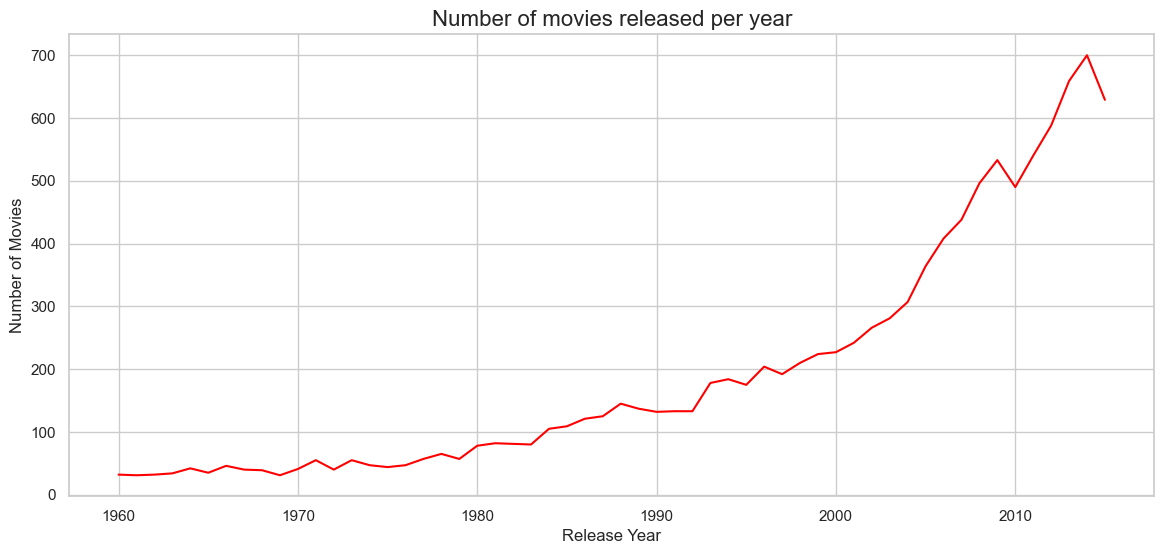

In [257]:
plt.figure(figsize = (14,6)) 
plt.plot (movies_per_year.index, movies_per_year.values, color = 'red')

plt.title('Number of movies released per year', fontsize = 16)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Number of Movies', fontsize = 12)
plt.grid(True)
plt.show()

**Number of movies per genre**

In [259]:
#dropping rows with missing genre values
df = df.dropna(subset = 'genres')
df.isnull().sum()

original_title             0
budget                     0
revenue                    0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [260]:
df.shape

(10843, 13)

In [261]:
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')
df_genres.head(4)

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893


In [262]:
# Count genres
genre_counts = df_genres['genres'].value_counts()
genre_counts

genres
Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: count, dtype: int64

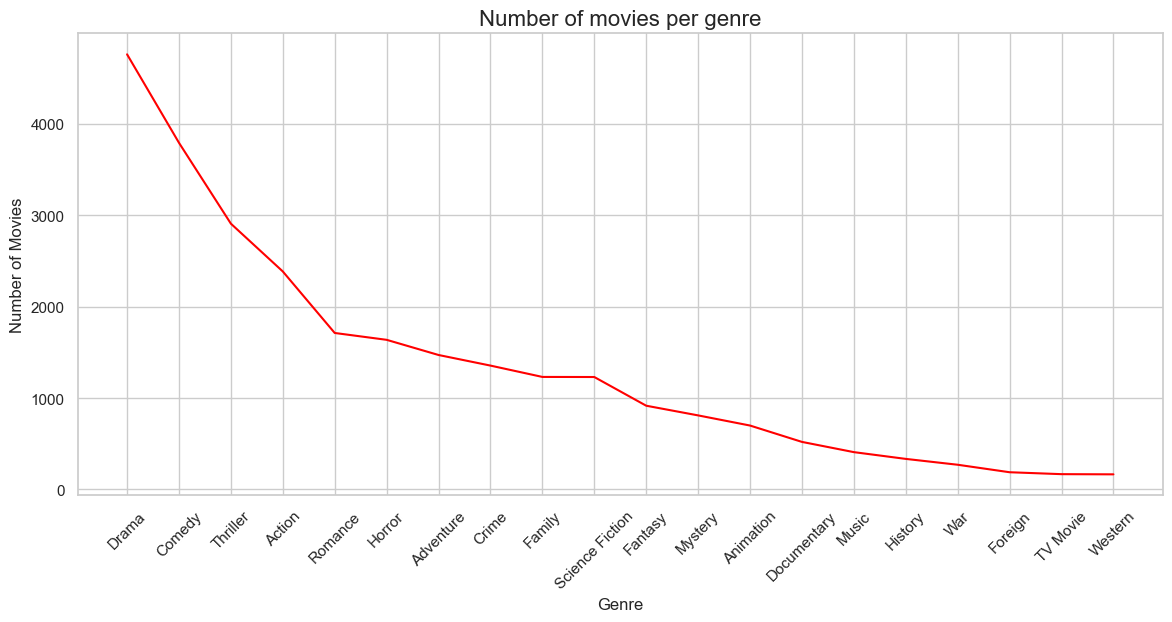

In [263]:
plt.figure(figsize = (14,6)) 
plt.plot (genre_counts.index, genre_counts.values, color = 'red')

plt.title('Number of movies per genre', fontsize = 16)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Number of Movies', fontsize = 12)
plt.xticks(rotation= 45)
plt.show()

**Top 10 movies by revenue**

In [265]:
top10_revenue = df.sort_values(by='revenue', ascending=False).head(10)
top10_revenue = top10_revenue[['original_title', 'revenue', 'release_year']]
print(top10_revenue)

                                    original_title      revenue  release_year
1386                                        Avatar  2781.505847          2009
3                     Star Wars: The Force Awakens  2068.178225          2015
5231                                       Titanic  1845.034188          1997
4361                                  The Avengers  1519.557910          2012
0                                   Jurassic World  1513.528810          2015
4                                        Furious 7  1506.249360          2015
14                         Avengers: Age of Ultron  1405.035767          2015
3374  Harry Potter and the Deathly Hallows: Part 2  1327.817822          2011
5422                                        Frozen  1274.219009          2013
5425                                    Iron Man 3  1215.439994          2013


**Top 10 movies by revenue adjusted**

In [267]:
top10_revenue_adj = df.sort_values(by='revenue_adj', ascending=False).head(10)
top10_revenue_adj = top10_revenue_adj[['original_title', 'revenue_adj', 'release_year']]
print(top10_revenue_adj)

                       original_title  revenue_adj  release_year
1386                           Avatar  2827.123750          2009
1329                        Star Wars  2789.712242          1977
5231                          Titanic  2506.405735          1997
10594                    The Exorcist  2167.324901          1973
9806                             Jaws  1907.005842          1975
3        Star Wars: The Force Awakens  1902.723130          2015
8889       E.T. the Extra-Terrestrial  1791.694309          1982
8094                          The Net  1583.049536          1995
10110  One Hundred and One Dalmatians  1574.814740          1961
4361                     The Avengers  1443.191435          2012


In [268]:
df[df.vote_count < 50]

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,Mythica: The Darkspore,0.000,0.0,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.000000,0.0
92,Mythica: The Necromancer,0.000,0.0,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0.000000,0.0
116,The Scorpion King: The Lost Throne,0.000,0.0,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,Universal Pictures,22,4.5,2015,0.000000,0.0
133,Louder Than Bombs,11.000,0.0,Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...,Joachim Trier,109,Drama,Motlys|Arte France CinÃ©ma|Animal Kingdom,43,6.3,2015,10.119996,0.0
143,Brothers of the Wind,0.000,0.0,Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen,Gerado Olivares|Otmar Penker,98,Adventure|Drama|Family,Terra Mater Factual Studios,11,7.5,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,The Endless Summer,0.000,0.0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000,0.0
10862,Grand Prix,0.000,0.0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000,0.0
10863,Beregis Avtomobilya,0.000,0.0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000,0.0
10864,"What's Up, Tiger Lily?",0.000,0.0,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000,0.0


**Top 10 movies by Vote average**

In [270]:
filtered_df = df[df['vote_count'] > 50]

top10_rated = filtered_df.sort_values(by='vote_average', ascending=False).head(10)
top10_rated = top10_rated[['original_title', 'vote_average', 'vote_count', 'release_year']]
print(top10_rated)

                                        original_title  vote_average  \
3690                                 The Art of Flight           8.5   
609      The Jinx: The Life and Deaths of Robert Durst           8.4   
4178                          The Shawshank Redemption           8.4   
7269                                     The Godfather           8.3   
3310  Dear Zachary: A Letter to a Son About His Father           8.3   
650                                           Whiplash           8.2   
4179                                      Forrest Gump           8.1   
5827                                 Jodorowsky's Dune           8.1   
4177                                      Pulp Fiction           8.1   
2875                                   The Dark Knight           8.1   

      vote_count  release_year  
3690          60          2011  
609           72          2015  
4178        5754          1994  
7269        3970          1972  
3310          74          2008  
650      

**Top 10 directors by number of movies and average rating**

In [272]:
has_pipe = df['director'].str.contains('\|', na=False)
df[has_pipe]

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,Minions,74.000000,1156.730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,68.079970,1064.192017
11,Jupiter Ascending,176.000003,183.987723,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,1937,5.2,2015,161.919931,169.268631
64,Focus,50.100000,153.962963,Will Smith|Margot Robbie|Rodrigo Santoro|Rober...,Glenn Ficarra|John Requa,105,Romance|Comedy|Crime|Drama,Kramer & Sigman Films|RatPac-Dune Entertainmen...,1831,6.7,2015,46.091980,141.645864
85,Vacation,31.000000,104.384188,Ed Helms|Christina Applegate|Skyler Gisondo|St...,John Francis Daley|Jonathan M. Goldstein,99,Adventure|Comedy,New Line Cinema|BenderSpink|David Dobkin Produ...,846,6.1,2015,28.519987,96.033411
100,Frozen Fever,0.000000,0.000000,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,Battlestar Galactica,3.000000,0.000000,Richard Hatch|Dirk Benedict|Lorne Greene|Herb ...,Richard A. Colla|Alan J. Levi,125,Science Fiction|Adventure,Universal TV|Glen A. Larson Productions,22,5.8,1978,10.028102,0.000000
10798,Heaven Can Wait,0.000000,0.000000,Warren Beatty|Julie Christie|James Mason|Jack ...,Warren Beatty|Buck Henry,101,Fantasy|Drama|Comedy|Romance,Paramount Pictures,40,6.3,1978,0.000000,0.000000
10816,The Rutles: All You Need Is Cash,0.000000,0.000000,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,14,6.0,1978,0.000000,0.000000
10820,How the Grinch Stole Christmas!,0.315000,0.000000,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,286,7.1,1966,2.116175,0.000000


In [273]:
df_directors = df.assign(director=df['director'].str.split('|')).explode('director')
df_directors.head(4)

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
1,Mad Max: Fury Road,150.0,378.436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137.999939,348.161293
2,Insurgent,110.0,295.238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101.199956,271.619025
3,Star Wars: The Force Awakens,200.0,2068.178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183.999919,1902.723130


In [274]:
df_directors.shape

(11898, 13)

In [275]:
df_directors.groupby('director')['vote_average'].mean().round(2).sort_values(ascending= False).head(10)

director
Mark Cousins              9.2
Derek Frankowski          8.8
David Mallet              8.7
Curt Morgan               8.5
Saul Swimmer              8.5
Michael Henry Wilson      8.5
Anthony Mandler           8.4
David Dawkins             8.4
Chris Hegedus             8.4
Jorge RamÃ­rez SuÃ¡rez    8.4
Name: vote_average, dtype: float64

**Average revenue and ratings by genre.**

In [277]:
df_genres.head()

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893
1,Mad Max: Fury Road,150.0,378.436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137.999939,348.161293


In [278]:
df_genres.groupby('genres')['revenue_adj'].mean().round(2)

genres
Action              91.72
Adventure          141.68
Animation           85.26
Comedy              47.90
Crime               56.60
Documentary          2.26
Drama               40.41
Family              87.74
Fantasy            111.23
Foreign              1.78
History             47.95
Horror              24.08
Music               46.66
Mystery             50.89
Romance             48.20
Science Fiction     86.91
TV Movie             0.35
Thriller            55.27
War                 69.99
Western             46.10
Name: revenue_adj, dtype: float64

In [279]:
df_genres.groupby('genres')['vote_average'].mean().round(2)

genres
Action             5.79
Adventure          5.94
Animation          6.40
Comedy             5.91
Crime              6.12
Documentary        6.91
Drama              6.17
Family             6.00
Fantasy            5.86
Foreign            5.98
History            6.41
Horror             5.34
Music              6.48
Mystery            5.95
Romance            6.04
Science Fiction    5.67
TV Movie           5.79
Thriller           5.75
War                6.30
Western            6.08
Name: vote_average, dtype: float64

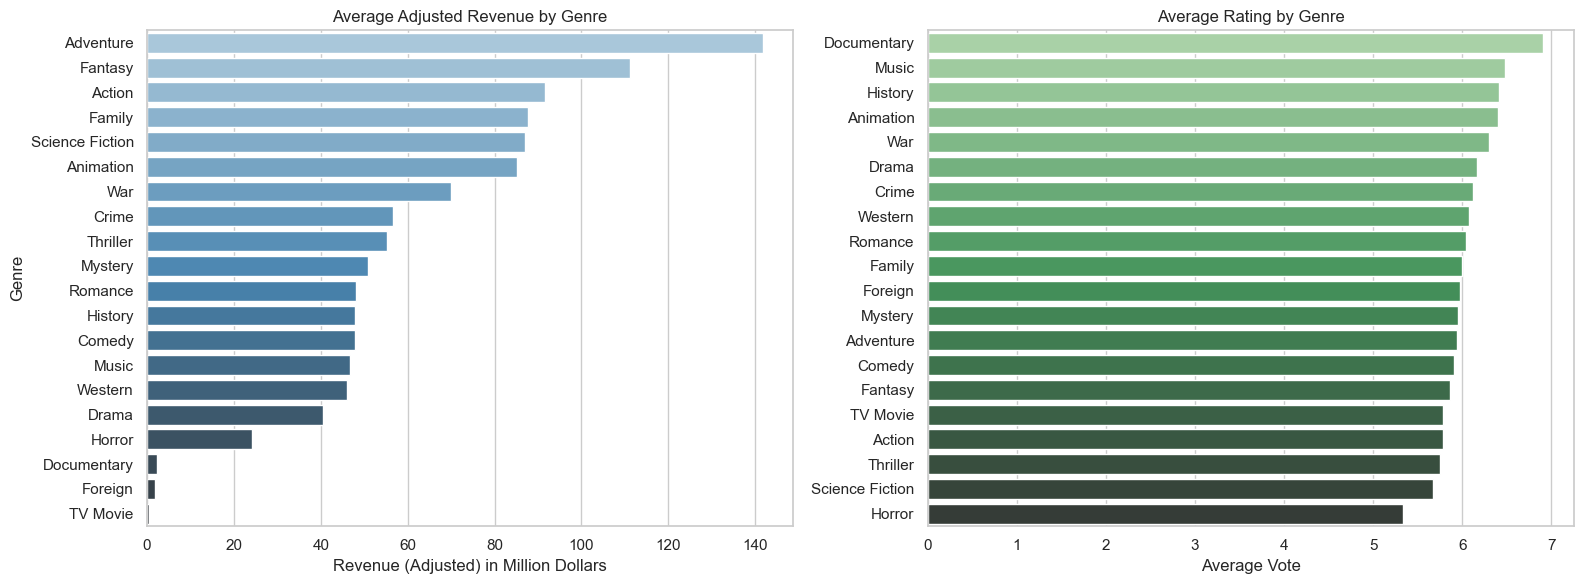

In [280]:
revenue_by_genre = df_genres.groupby('genres')['revenue_adj'].mean().round(2).sort_values(ascending=False)
rating_by_genre = df_genres.groupby('genres')['vote_average'].mean().round(2).sort_values(ascending=False)

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot average adjusted revenue by genre
sns.barplot(x=revenue_by_genre.values, y=revenue_by_genre.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Average Adjusted Revenue by Genre")
axes[0].set_xlabel("Revenue (Adjusted) in Million Dollars")
axes[0].set_ylabel("Genre")

# Plot average vote average by genre
sns.barplot(x=rating_by_genre.values, y=rating_by_genre.index, ax=axes[1], palette="Greens_d")
axes[1].set_title("Average Rating by Genre")
axes[1].set_xlabel("Average Vote")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Genre trends over time**

In [282]:
genre_trend = df_genres.groupby(['release_year', 'genres']).size().reset_index(name='movie_count')
genre_trend

,release_year,genres,movie_count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
...,...,...,...
1044,2015,Science Fiction,86
1045,2015,TV Movie,20
1046,2015,Thriller,171
1047,2015,War,9


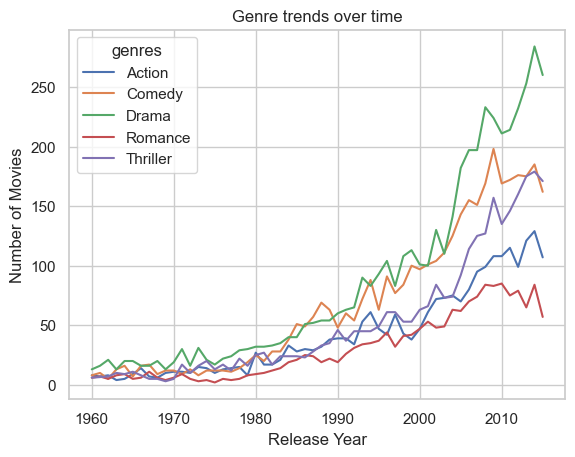

In [283]:
top_genres = df_genres['genres'].value_counts().head(5).index.tolist()
top_trends = genre_trend[genre_trend['genres'].isin(top_genres)]
sns.lineplot(data=top_trends, x='release_year', y='movie_count', hue='genres')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Genre trends over time')
plt.show()

### Correlation Heatmap

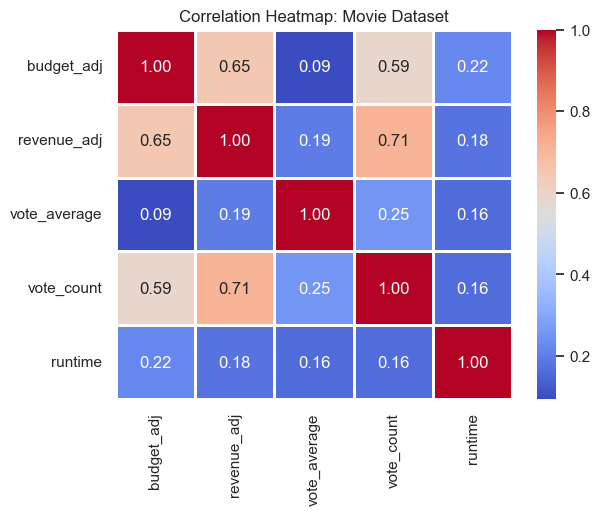

In [285]:
numeric_cols = ['budget_adj', 'revenue_adj', 'vote_average', 'vote_count', 'runtime']

df_corr = df[numeric_cols].dropna()

corr_matrix = df_corr.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths = 0.9)
plt.title('Correlation Heatmap: Movie Dataset')
plt.show()

**How have runtimes evolved over the decades?**

In [287]:
df['decade'] = (df['release_year'] // 10) * 10
df.head()

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,Jurassic World,150.0,1513.528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,2010
1,Mad Max: Fury Road,150.0,378.436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137.999939,348.161293,2010
2,Insurgent,110.0,295.238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101.199956,271.619025,2010
3,Star Wars: The Force Awakens,200.0,2068.178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183.999919,1902.723130,2010
4,Furious 7,190.0,1506.249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174.799923,1385.748801,2010


In [288]:
runtime_by_decade = df.groupby('decade')['runtime'].mean().reset_index()
runtime_by_decade

,decade,runtime
0,1960,111.417127
1,1970,108.075099
2,1980,104.330508
3,1990,106.674986
4,2000,102.123172
5,2010,97.507234


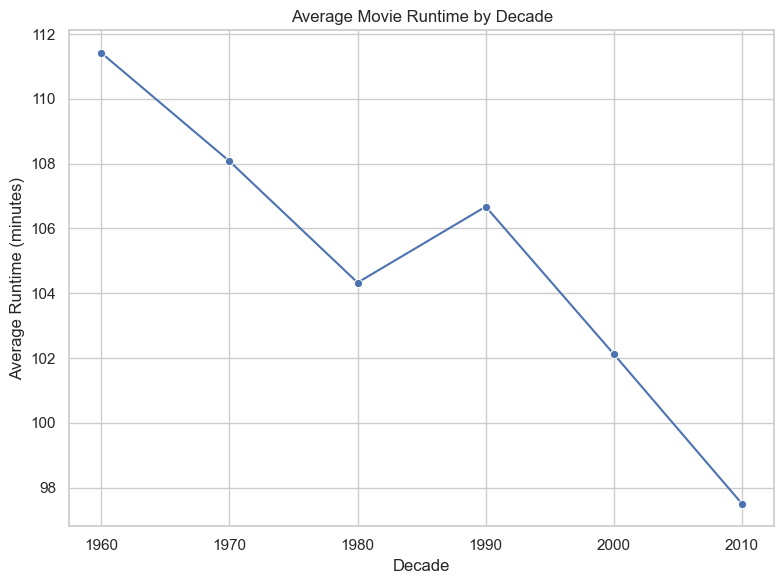

In [289]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=runtime_by_decade, x='decade', y='runtime', marker='o')
plt.title('Average Movie Runtime by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Studio Analysis**

In [335]:
df_studios = df.assign(studio=df['production_companies'].str.split('|')).explode('studio')
df_studios.head(4)

,original_title,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,studio
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,2010,Universal Studios
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,2010,Amblin Entertainment
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,2010,Legendary Pictures
0,Jurassic World,150.0,1513.52881,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,2010,Fuji Television Network


In [343]:
df_studios.studio.nunique()

7874

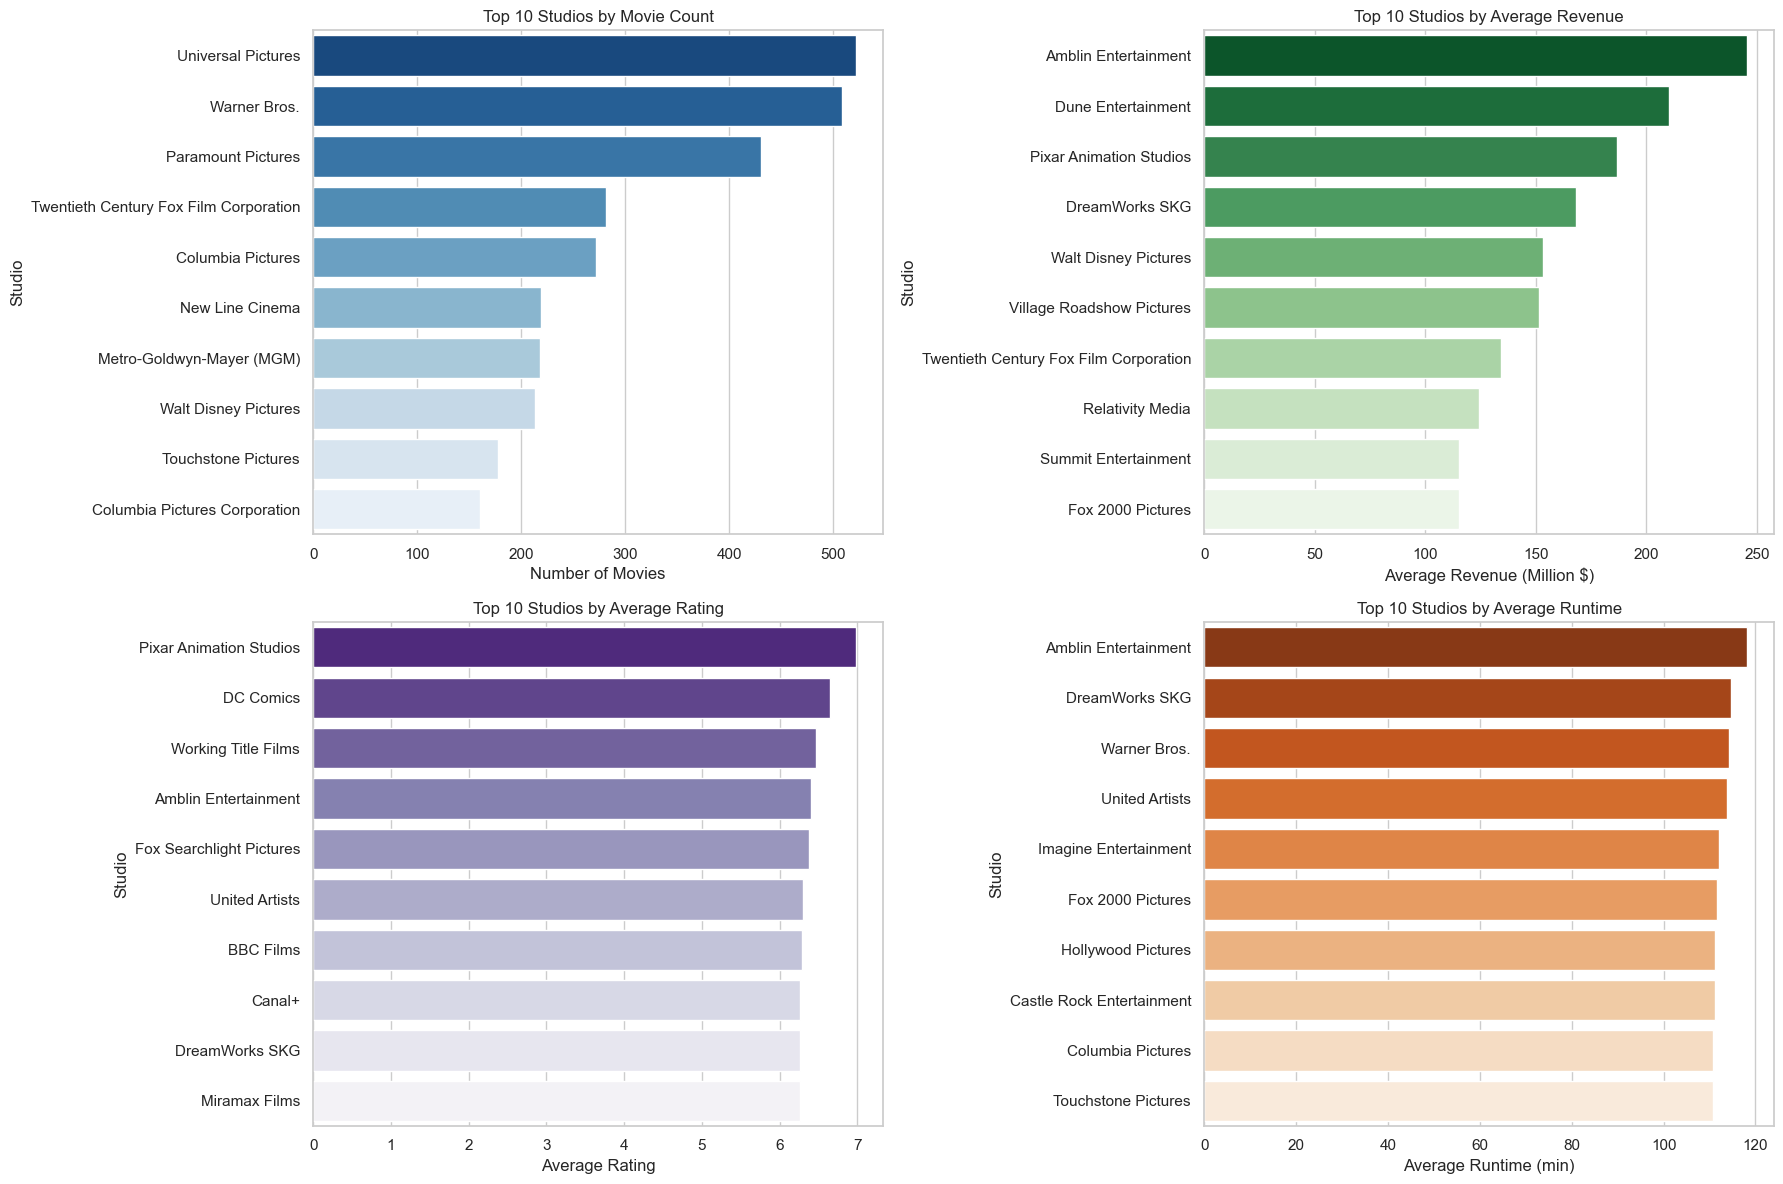

In [353]:
studio_stats = df_studios.groupby('studio').agg(
    movie_count=('original_title', 'count'),
    avg_revenue=('revenue', 'mean'),
    avg_vote=('vote_average', 'mean'),
    avg_runtime=('runtime', 'mean')
).reset_index()

# Filter studios with more than 50 movies
studio_stats_filtered = studio_stats[studio_stats['movie_count'] > 50]

# Sort and select top 10 for each metric
top_movie_count = studio_stats_filtered.sort_values('movie_count', ascending=False).head(10)
top_avg_revenue = studio_stats_filtered.sort_values('avg_revenue', ascending=False).head(10)
top_avg_vote = studio_stats_filtered.sort_values('avg_vote', ascending=False).head(10)
top_avg_runtime = studio_stats_filtered.sort_values('avg_runtime', ascending=False).head(10)

# Plot setup
plt.figure(figsize=(18, 12))
sns.set(style='whitegrid')

# Top-left: Movie Count
plt.subplot(2, 2, 1)
sns.barplot(x='movie_count', y='studio', data=top_movie_count, palette='Blues_r')
plt.title('Top 10 Studios by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Studio')

# Top-right: Average Revenue
plt.subplot(2, 2, 2)
sns.barplot(x='avg_revenue', y='studio', data=top_avg_revenue, palette='Greens_r')
plt.title('Top 10 Studios by Average Revenue')
plt.xlabel('Average Revenue (Million $)')
plt.ylabel('Studio')

# Bottom-left: Average Rating
plt.subplot(2, 2, 3)
sns.barplot(x='avg_vote', y='studio', data=top_avg_vote, palette='Purples_r')
plt.title('Top 10 Studios by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Studio')

# Bottom-right: Average Runtime
plt.subplot(2, 2, 4)
sns.barplot(x='avg_runtime', y='studio', data=top_avg_runtime, palette='Oranges_r')
plt.title('Top 10 Studios by Average Runtime')
plt.xlabel('Average Runtime (min)')
plt.ylabel('Studio')

plt.tight_layout()
plt.show()

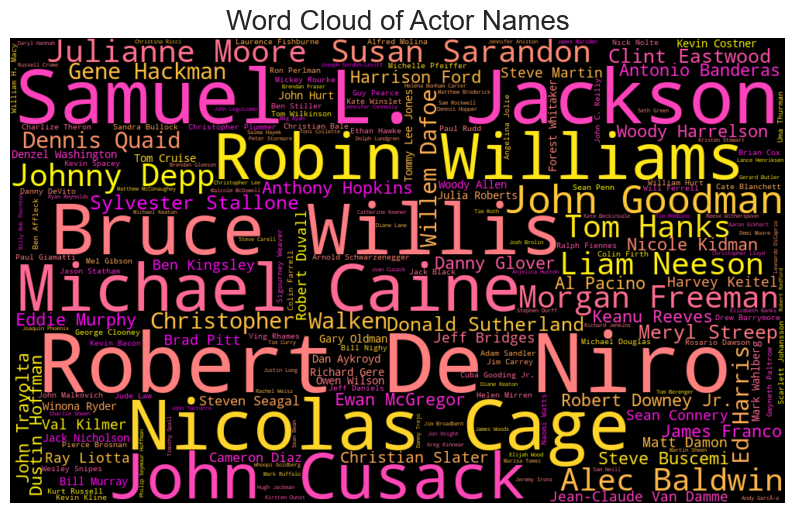

In [291]:
from wordcloud import WordCloud

# Step 1: Combine all actor names into one long string
all_actors = df['cast'].dropna().str.cat(sep='|')  # Concatenate all cast strings
all_actors_list = all_actors.split('|')            # Split by '|'

# Optional: remove any blank entries
all_actors_list = [actor.strip() for actor in all_actors_list if actor.strip()]

# Step 2: Create a frequency dictionary
from collections import Counter
actor_freq = Counter(all_actors_list)

# Step 3: Generate Word Cloud
wordcloud = WordCloud(width=1000, height=600, background_color='black',
                      colormap='spring', max_words=200).generate_from_frequencies(actor_freq)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Actor Names', fontsize=20)
plt.show()